## <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

## <b> Explore and analyze the data to discover important factors that govern the bookings. </b>

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import numpy as np
import pandas as pd
import matplotlib as mpl
from matplotlib import pyplot as plt
from matplotlib import style
import seaborn as sns

In [3]:
# Importing the csv file.
path = "C:\\Users\\ommde\\Desktop\\Capstone Project\\Copy of Hotel Bookings.csv"
data = pd.read_csv(path)

In [4]:
# First 5 rows
data.head(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [5]:
#Last 5 rows
data.tail()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07
119389,City Hotel,0,205,2017,August,35,29,2,7,2,...,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,2017-09-07


In [6]:
#Columns
data.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [7]:
#Detailed informations of all the columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [8]:
#Finding Null values
data.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [9]:
data.isnull().sum().sort_values(ascending= False)[:4]

company     112593
agent        16340
country        488
children         4
dtype: int64

# Handling NULL values

In [10]:
#Column 'company' is dropped becuse of null values more tah 90%
data.drop(['company'],axis =1, inplace=True  )

In [11]:
data.isna().sum()

hotel                                 0
is_canceled                           0
lead_time                             0
arrival_date_year                     0
arrival_date_month                    0
arrival_date_week_number              0
arrival_date_day_of_month             0
stays_in_weekend_nights               0
stays_in_week_nights                  0
adults                                0
children                              4
babies                                0
meal                                  0
country                             488
market_segment                        0
distribution_channel                  0
is_repeated_guest                     0
previous_cancellations                0
previous_bookings_not_canceled        0
reserved_room_type                    0
assigned_room_type                    0
booking_changes                       0
deposit_type                          0
agent                             16340
days_in_waiting_list                  0


In [12]:
#Filling 'children' and 'agent' column with 0 and 'country' column with 'other'
data.fillna({'children': 0, 'country':'other','agent':0},inplace = True)

In [13]:
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,3,No Deposit,0.0,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,4,No Deposit,0.0,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,0,No Deposit,0.0,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,0,No Deposit,304.0,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,0,No Deposit,240.0,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [14]:
data.isnull().sum().sum()

0

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 31 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119390 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

## => All the null values have been filled 

# Removing outliers

In [16]:
data['toddler'] = data['babies']+data['children']

In [17]:
data.drop(['babies','children'],axis = 1, inplace = True)

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 30 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  meal                            119390 non-null  object 
 11  country                         119390 non-null  object 
 12  market_segment  

In [19]:
# Checking the number of duplicate rows
data.loc[data.duplicated()].shape

(32002, 30)

In [20]:
# Removing duplicate rows
data.drop_duplicates(inplace = True)

In [21]:
# Again checking the number of duplicate rows
data.loc[data.duplicated()].shape

(0, 30)

In [22]:
# Description of data
data.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,toddler
count,87388.000000,87388.000000,87388.000000,87388.000000,87388.000000,87388.000000,87388.000000,87388.000000,87388.000000,87388.000000,87388.000000,87388.000000,87388.000000,87388.000000,87388.000000,87388.000000,87388.000000,87388.000000
mean,0.274923,79.896714,2016.210326,26.837712,15.815547,1.005333,2.625544,1.875841,0.039079,0.030416,0.184007,0.271616,81.009017,0.749634,106.339411,0.084234,0.698586,0.149460
std,0.446478,86.053648,0.686085,13.674423,8.835182,1.031935,2.053602,0.626493,0.193783,0.369162,1.731972,0.727270,109.947179,10.016187,55.013319,0.281545,0.831954,0.471739
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000,0.000000
25%,0.000000,11.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000,72.000000,0.000000,0.000000,0.000000
50%,0.000000,49.000000,2016.000000,27.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000,98.100000,0.000000,0.000000,0.000000
75%,1.000000,125.000000,2017.000000,37.000000,23.000000,2.000000,4.000000,2.000000,0.000000,0.000000,0.000000,0.000000,234.000000,0.000000,134.000000,0.000000,1.000000,0.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,1.000000,26.000000,72.000000,21.000000,535.000000,391.000000,5400.000000,8.000000,5.000000,10.000000


In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87388 entries, 0 to 119389
Data columns (total 30 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           87388 non-null  object 
 1   is_canceled                     87388 non-null  int64  
 2   lead_time                       87388 non-null  int64  
 3   arrival_date_year               87388 non-null  int64  
 4   arrival_date_month              87388 non-null  object 
 5   arrival_date_week_number        87388 non-null  int64  
 6   arrival_date_day_of_month       87388 non-null  int64  
 7   stays_in_weekend_nights         87388 non-null  int64  
 8   stays_in_week_nights            87388 non-null  int64  
 9   adults                          87388 non-null  int64  
 10  meal                            87388 non-null  object 
 11  country                         87388 non-null  object 
 12  market_segment                 

In [24]:
def remove_outlier(x):
    Q1 = x.quantile(0.25)
    Q3 = x.quantile(0.75)
    IQR = Q3-Q1
    upper_limit = Q3 + (IQR*1.5)
    lower_limit = Q1 - (IQR*1.5)
    return (Q1,Q3,IQR,upper_limit,lower_limit)



In [25]:
# Removing outliers in lead_time
remove_outlier(data['lead_time'])

(11.0, 125.0, 114.0, 296.0, -160.0)

In [26]:
req_data = data[(data.lead_time > -160.0) & (data.lead_time < 296.0)]
req_data

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,toddler
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,0.0,0,Transient,75.00,0,0,Check-Out,2015-07-02,0.0
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,0,Transient,75.00,0,0,Check-Out,2015-07-02,0.0
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,0,Transient,98.00,0,1,Check-Out,2015-07-03,0.0
6,Resort Hotel,0,0,2015,July,27,1,0,2,2,...,No Deposit,0.0,0,Transient,107.00,0,0,Check-Out,2015-07-03,0.0
7,Resort Hotel,0,9,2015,July,27,1,0,2,2,...,No Deposit,303.0,0,Transient,103.00,0,1,Check-Out,2015-07-03,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,0,Transient,96.14,0,0,Check-Out,2017-09-06,0.0
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,0,Transient,225.43,0,2,Check-Out,2017-09-07,0.0
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,0,Transient,157.71,0,4,Check-Out,2017-09-07,0.0
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,0,Transient,104.40,0,0,Check-Out,2017-09-07,0.0


<AxesSubplot:title={'center':'lead_time(after)'}, ylabel='lead_time'>

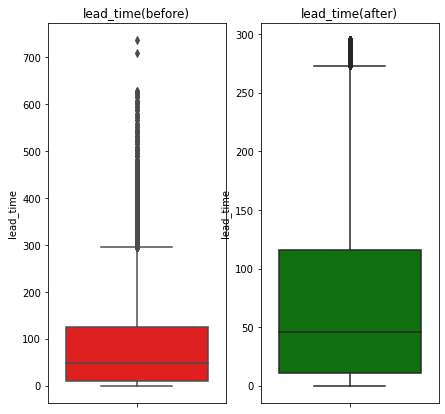

In [27]:
plt.figure(figsize = (7,7))
plt.subplot(1,2,1)
plt.title('lead_time(before)')
sns.boxplot(y = data['lead_time'], color = 'r')
plt.subplot(1,2,2)
plt.title('lead_time(after)')
sns.boxplot(y = req_data['lead_time'], color = 'g')

In [28]:
req_data.toddler.unique()

array([ 0.,  1.,  2., 10.,  3.,  9.])

In [29]:
df = req_data.loc[req_data.toddler<= 3]
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,toddler
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,0.0,0,Transient,75.00,0,0,Check-Out,2015-07-02,0.0
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,0,Transient,75.00,0,0,Check-Out,2015-07-02,0.0
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,0,Transient,98.00,0,1,Check-Out,2015-07-03,0.0
6,Resort Hotel,0,0,2015,July,27,1,0,2,2,...,No Deposit,0.0,0,Transient,107.00,0,0,Check-Out,2015-07-03,0.0
7,Resort Hotel,0,9,2015,July,27,1,0,2,2,...,No Deposit,303.0,0,Transient,103.00,0,1,Check-Out,2015-07-03,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,0,Transient,96.14,0,0,Check-Out,2017-09-06,0.0
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,0,Transient,225.43,0,2,Check-Out,2017-09-07,0.0
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,0,Transient,157.71,0,4,Check-Out,2017-09-07,0.0
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,0,Transient,104.40,0,0,Check-Out,2017-09-07,0.0


In [30]:
df1 = df[df.adults!=0]

In [31]:
# Converting datatype of columns 'agent' and 'toddler' from float to int.
df1[['agent','toddler']]=df1[['agent','toddler']].astype('int64')

In [32]:
# changing datatype of column 'reservation_status_date' to date_type.
df1['reservation_status_date'] = pd.to_datetime(df1['reservation_status_date'], format = '%Y-%m-%d')

In [33]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84582 entries, 2 to 119389
Data columns (total 30 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   hotel                           84582 non-null  object        
 1   is_canceled                     84582 non-null  int64         
 2   lead_time                       84582 non-null  int64         
 3   arrival_date_year               84582 non-null  int64         
 4   arrival_date_month              84582 non-null  object        
 5   arrival_date_week_number        84582 non-null  int64         
 6   arrival_date_day_of_month       84582 non-null  int64         
 7   stays_in_weekend_nights         84582 non-null  int64         
 8   stays_in_week_nights            84582 non-null  int64         
 9   adults                          84582 non-null  int64         
 10  meal                            84582 non-null  object        
 11  c

In [34]:
# Adding total staying days in hotels
df1['total_stay'] = df1['stays_in_weekend_nights']+df1['stays_in_week_nights']

# Adding total people num as column, i.e. total people num = num of adults + toddler
df1['total_people'] = df1['adults']+df1['toddler']

Lets first find the correlation between the numerical data.


Since, columns like 'is_cancelled', 'arrival_date_year', 'arrival_date_week_number', 'arrival_date_day_of_month', 'is_repeated_guest', 'company', 'agent' are categorical data having numerical type. So we wont need to check them for correlation.


In [35]:
num_req_df = df1[['lead_time','total_stay','adults','previous_cancellations','previous_bookings_not_canceled','booking_changes','days_in_waiting_list','adr','required_car_parking_spaces','total_of_special_requests','toddler']]
num_req_df

,lead_time,total_stay,adults,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,toddler
2,7,1,1,0,0,0,0,75.00,0,0,0
3,13,1,1,0,0,0,0,75.00,0,0,0
4,14,2,2,0,0,0,0,98.00,0,1,0
6,0,2,2,0,0,0,0,107.00,0,0,0
7,9,2,2,0,0,0,0,103.00,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
119385,23,7,2,0,0,0,0,96.14,0,0,0
119386,102,7,3,0,0,0,0,225.43,0,2,0
119387,34,7,2,0,0,0,0,157.71,0,4,0
119388,109,7,2,0,0,0,0,104.40,0,0,0


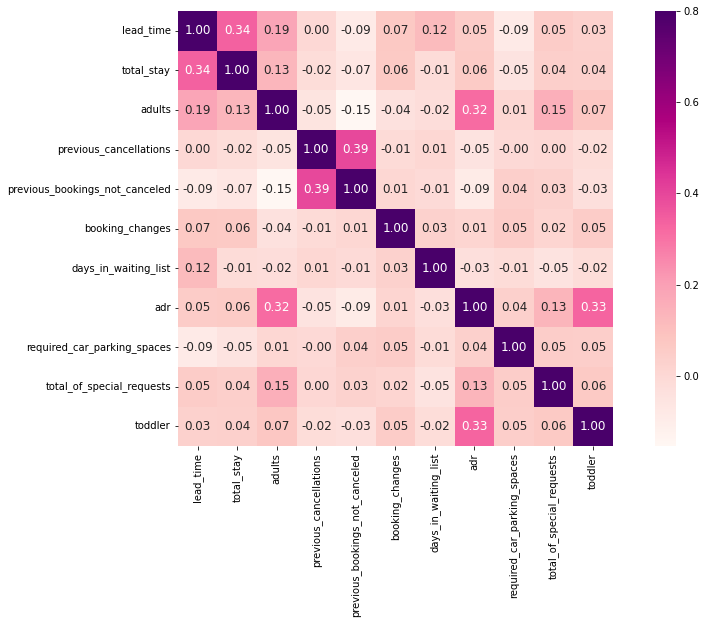

In [36]:
# Heat map
corrmat = num_req_df.corr()
f, ax = plt.subplots(figsize=(15, 8))
sns.heatmap(corrmat,annot = True,fmt='.2f', annot_kws={'size': 12},cmap= 'RdPu',  vmax=.8, square=True);

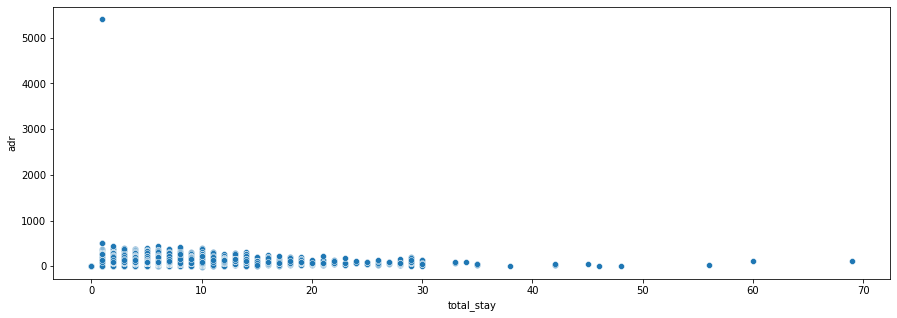

In [37]:
#Scatter plot of adr vs total stay
plt.figure(figsize = (15,5))
sns.scatterplot(y = 'adr', x = 'total_stay', data = df1)
plt.show()

In [38]:
#Dropped the outlier.
df1.drop(df1[df1['adr'] > 5000].index, inplace = True)

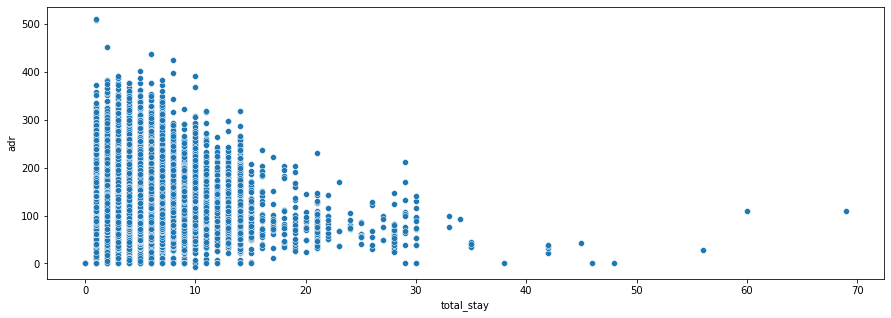

In [39]:
#Scatter plot of adr vs total stay after removal of outlier.
plt.figure(figsize = (15,5))
sns.scatterplot(y = 'adr', x = 'total_stay', data = df1)
plt.show()

<AxesSubplot:title={'center':'Total nights stay'}, xlabel='hotel', ylabel='total_stay'>

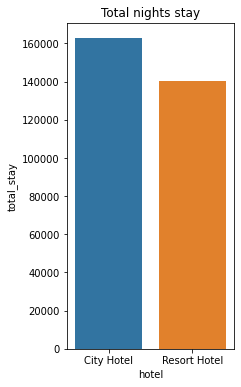

In [86]:
# Total nights spent in both the types of hotels
plt.figure(figsize=(3,6))
plt.title("Total nights stay")
hotel_group = df1.loc[:,['hotel','total_stay']].groupby('hotel').sum()
sns.barplot(x = hotel_group.index,y =hotel_group.total_stay)

In [41]:
total_booking = pd.DataFrame(df1.hotel.unique(),df1.hotel.value_counts())
total_booking

,0
hotel,
51849,Resort Hotel
32732,City Hotel


<AxesSubplot:title={'center':'Total Bookings'}, xlabel='hotel', ylabel='count'>

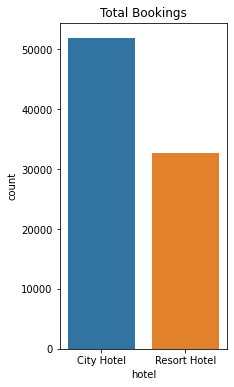

In [87]:
plt.figure(figsize=(3,6))
plt.title("Total Bookings")
sns.countplot(x ='hotel',  data = df1, order=df1['hotel'].value_counts().index)

In [43]:

hotel_group1 = df1.loc[:,['hotel','is_canceled']].value_counts()
hotel = []
is_canceled = []
value_count =[]
for i in hotel_group1.index :
    hotel.append(i[0])
    if i[1] == 0 :
        is_canceled.append('confirmed')
    else : is_canceled.append('cancelled')
    value_count.append(hotel_group1[i])
d1 = pd.DataFrame({'hotel' : hotel,'status':is_canceled,'value_count':value_count})
d1

,hotel,status,value_count
0,City Hotel,confirmed,36556
1,Resort Hotel,confirmed,25208
2,City Hotel,cancelled,15293
3,Resort Hotel,cancelled,7524


<AxesSubplot:title={'center':'Confirmation Status'}, xlabel='hotel', ylabel='value_count'>

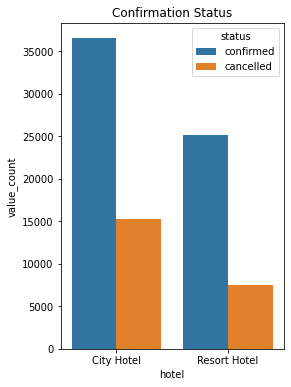

In [88]:
plt.figure(figsize=(4,6))
plt.title("Confirmation Status")
sns.barplot(x = d1.hotel,y = d1.value_count, hue = d1.status,ci =None)

In [45]:
# Top 10 agents according to number of bookings
agent_group = df1.loc[:,['agent']].value_counts()
agent = []
value_count =[]
for i in agent_group.index :
    agent.append(i[0])
    value_count.append(agent_group[i])
d6 = pd.DataFrame({'agent' : agent,'booking_count':value_count})
d7 = d6.sort_values(by ='booking_count',ascending = False )[:10]

<AxesSubplot:xlabel='agent', ylabel='booking_count'>

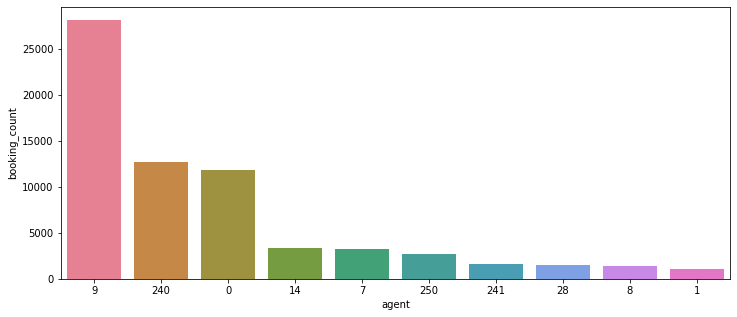

In [46]:
plt.figure(figsize=(12,5))
sns.barplot(x = d7.agent,y = d7.booking_count,order = d7.sort_values("booking_count", ascending = False).agent ,palette = "husl", ci = None)

<AxesSubplot:xlabel='country', ylabel='No of guests'>

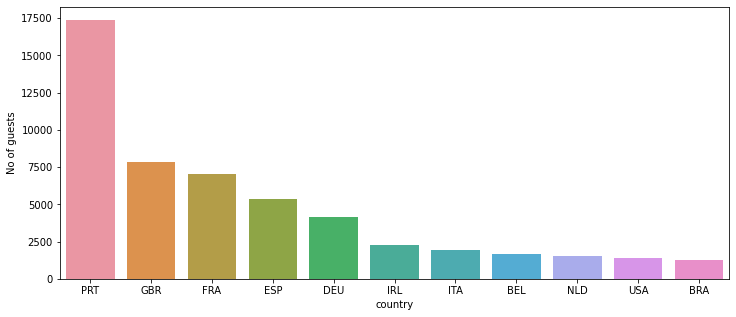

In [47]:
country_wise_guests = df1[df1['is_canceled'] == 0]['country'].value_counts().reset_index().loc[:10,:]
country_wise_guests.columns = ['country', 'No of guests']
plt.figure(figsize=(12,5))
sns.barplot(x ='country',y = 'No of guests',data = country_wise_guests )

In [48]:
df1.adr.unique()

array([ 75.  ,  98.  , 107.  , ..., 266.75, 209.25, 157.71])

<AxesSubplot:xlabel='adults', ylabel='adr'>

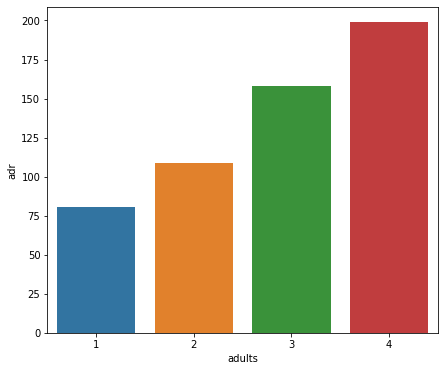

In [49]:
# Checking the adr change according to the number of adults
plt.figure(figsize=(7,6))
sns.barplot(x = df1.adults,y = df1.adr, ci = None)

<AxesSubplot:xlabel='toddler', ylabel='adr'>

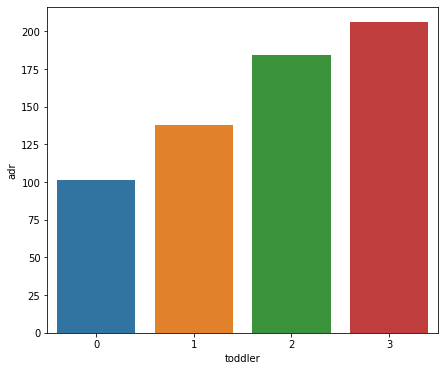

In [50]:
# Checking the adr change according to the number of toddler
plt.figure(figsize=(7,6))
sns.barplot(x = df1.toddler,y = df1.adr,ci = None)

In [51]:
hotel_group3 = df1.loc[:,['toddler','is_canceled']].value_counts()
toddler = []
is_canceled = []
value_count =[]
for i in hotel_group3.index :
    toddler.append(i[0])
    if i[1] == 0 :
        is_canceled.append('not-cancelled')
    else : is_canceled.append('cancelled')
    value_count.append(hotel_group3[i])
d3 = pd.DataFrame({'toddler' : toddler,'is_canceled':is_canceled,'value_count':value_count})
d3

,toddler,is_canceled,value_count
0,0,not-cancelled,56009
1,0,cancelled,19917
2,1,not-cancelled,3630
3,2,not-cancelled,2054
4,1,cancelled,1505
5,2,cancelled,1370
6,3,not-cancelled,71
7,3,cancelled,25


In [52]:
hotel_group2 = df1.loc[:,['toddler','is_canceled']].value_counts()
toddler = []
is_canceled = []
value_count =[]
for i in hotel_group2.index :
    if i[1] != 0 :
        toddler.append(i[0])
        value_count.append(hotel_group2[i])
d2 = pd.DataFrame({'toddler' : toddler,'cancelled':value_count})
d2

,toddler,cancelled
0,0,19917
1,1,1505
2,2,1370
3,3,25


<AxesSubplot:xlabel='toddler', ylabel='cancelled'>

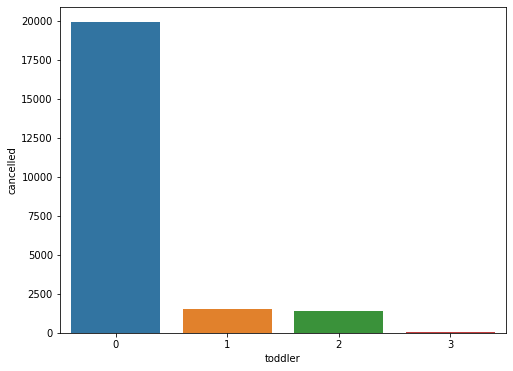

In [53]:
plt.figure(figsize=(8,6))
sns.barplot(x = d2.toddler,y = d2.cancelled,ci =None)

In [54]:
d4 = df1.loc[:,['arrival_date_year','total_stay']]
d4
data_group5 = d4.groupby('arrival_date_year').sum()
data_group5

,total_stay
arrival_date_year,
2015,49385
2016,143255
2017,110697


In [55]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84581 entries, 2 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   hotel                           84581 non-null  object        
 1   is_canceled                     84581 non-null  int64         
 2   lead_time                       84581 non-null  int64         
 3   arrival_date_year               84581 non-null  int64         
 4   arrival_date_month              84581 non-null  object        
 5   arrival_date_week_number        84581 non-null  int64         
 6   arrival_date_day_of_month       84581 non-null  int64         
 7   stays_in_weekend_nights         84581 non-null  int64         
 8   stays_in_week_nights            84581 non-null  int64         
 9   adults                          84581 non-null  int64         
 10  meal                            84581 non-null  object        
 11  c

In [56]:
# status of hotel with respect to number of special requests
hotel_group_s = df1.loc[:,['total_of_special_requests','is_canceled']].value_counts()
special_requests = []
is_canceled = []
value_count =[]
for i in hotel_group_s.index :
    special_requests.append(i[0])
    if i[1] == 0 :
        is_canceled.append('confirmed')
    else : is_canceled.append('cancelled')
    value_count.append(hotel_group_s[i])
ds = pd.DataFrame({'special_requests' : special_requests,'status':is_canceled,'cancelled':value_count})
ds

,special_requests,status,cancelled
0,0,confirmed,28531
1,1,confirmed,21994
2,0,cancelled,13795
3,2,confirmed,9077
4,1,cancelled,6255
5,2,cancelled,2364
6,3,confirmed,1853
7,3,cancelled,369
8,4,confirmed,275
9,5,confirmed,34


<AxesSubplot:xlabel='special_requests', ylabel='cancelled'>

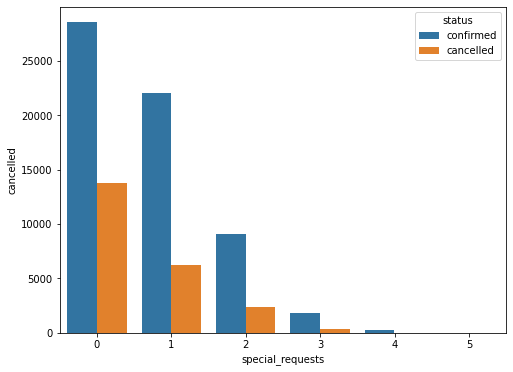

In [57]:
plt.figure(figsize=(8,6))
sns.barplot(x = ds.special_requests,y = ds.cancelled, hue = ds.status,ci =None)

In [58]:
#Customer repetition check
df_rep_cust = df1.loc[:,['is_repeated_guest']].value_counts()

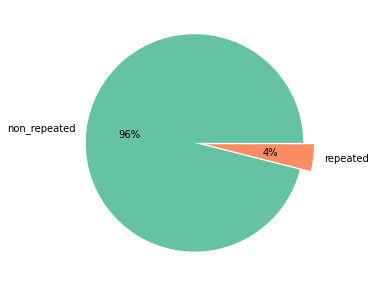

In [59]:
plt.figure(figsize=(5,5))
plt.pie(df_rep_cust,labels = ["non_repeated", "repeated"],colors = sns.color_palette("Set2"), explode = [0,0.1] ,autopct='%.0f%%')
plt.show()

In [60]:
# Checking distribution channel booking vs cancelled percentage
df_dist_ch = df1.loc[:,['distribution_channel']].value_counts()
df_dist_ch

distribution_channel
TA/TO                   66737
Direct                  12721
Corporate                4937
GDS                       181
Undefined                   5
dtype: int64

In [61]:
df1_cancel = df1[df1['is_canceled']==1]
df_dist_cancel = df1_cancel.loc[:,['distribution_channel']].value_counts()
df_dist_cancel

distribution_channel
TA/TO                   20276
Direct                   1861
Corporate                 640
GDS                        36
Undefined                   4
dtype: int64

<Figure size 432x432 with 0 Axes>

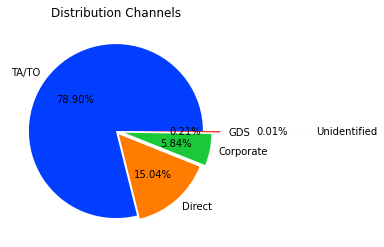

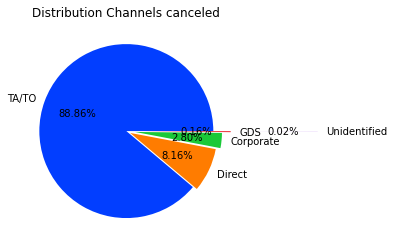

In [62]:
plt.figure(figsize=(6,6))
plt.subplots(1,1)
plt.title('Distribution Channels')
plt.pie(df_dist_ch,labels = ["TA/TO", "Direct","Corporate","GDS","Unidentified"],colors = sns.color_palette("bright"), explode = [0,0.05,0.1,0.2,1.2] ,autopct='%.2f%%')
plt.subplots(1,1)
plt.title('Distribution Channels canceled')
plt.pie(df_dist_cancel,labels = ["TA/TO", "Direct","Corporate","GDS","Unidentified"],colors = sns.color_palette("bright"), explode = [0,0.05,0.1,0.2,1.2] ,autopct='%.2f%%')
plt.show()

In [63]:
#Checking effect of diposit on Cancellation
hotel_group_dtype = df1.loc[:,['deposit_type','is_canceled']].value_counts()
d_type = []
is_canceled = []
value_count =[]
for i in hotel_group_dtype.index :
    d_type.append(i[0])
    if i[1] == 0 :
        is_canceled.append('confirmed')
    else : is_canceled.append('cancelled')
    value_count.append(hotel_group_dtype[i])
dtype_df = pd.DataFrame({'Diposit Type' : d_type,'status':is_canceled,'cancelled':value_count})
dtype_df

,Diposit Type,status,cancelled
0,No Deposit,confirmed,61635
1,No Deposit,cancelled,22087
2,Non Refund,cancelled,707
3,Refundable,confirmed,74
4,Non Refund,confirmed,55
5,Refundable,cancelled,23


<AxesSubplot:xlabel='Diposit Type', ylabel='cancelled'>

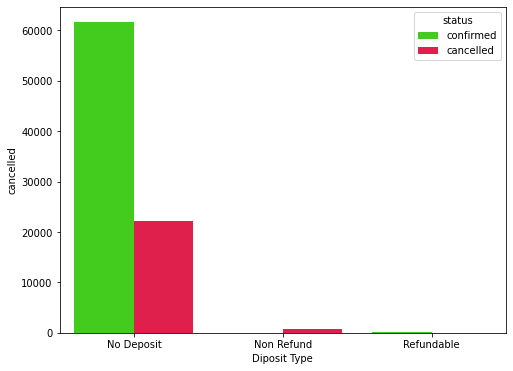

In [64]:
plt.figure(figsize=(8,6))
sns.barplot(x = dtype_df['Diposit Type'],y = dtype_df.cancelled, hue = dtype_df.status, palette= 'prism',ci =None)

In [65]:
# Most preferred meal
df_meal = df1.loc[:,['meal']].value_counts()
df_meal.index

MultiIndex([(       'BB',),
            (       'SC',),
            (       'HB',),
            ('Undefined',),
            (       'FB',)],
           names=['meal'])

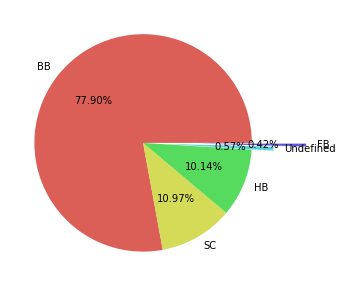

In [66]:
plt.figure(figsize=(5,5))
plt.pie(df_meal,labels = ['BB','SC','HB','Undefined','FB'],colors = sns.color_palette("hls"), explode = [0,0,0,0.2,0.5] ,autopct='%.2f%%')
plt.show()

<AxesSubplot:>

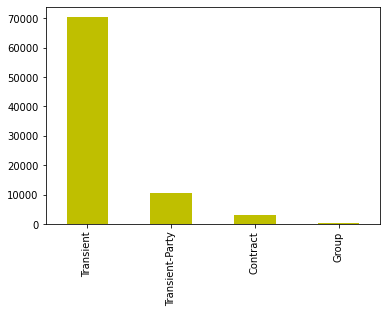

In [67]:
df1.customer_type.value_counts().plot(kind= "bar", color = 'y')

<AxesSubplot:>

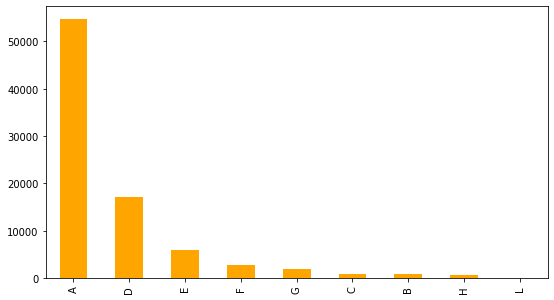

In [68]:
plt.figure(figsize=(9,5))
df1.reserved_room_type.value_counts().plot(kind = "bar", color = "orange")

<AxesSubplot:>

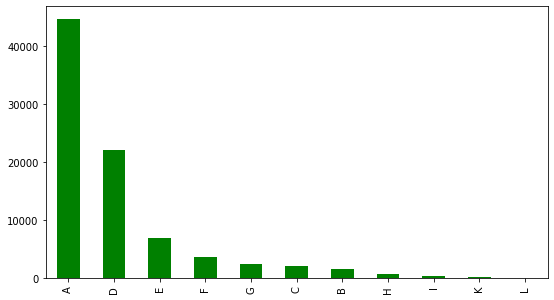

In [69]:
plt.figure(figsize=(9,5))
df1.assigned_room_type.value_counts().plot(kind = "bar", color = "g")

In [70]:
gr1 = df1.loc[:,['hotel','arrival_date_year']].groupby(['hotel']).arrival_date_year.value_counts().unstack(level = 0)
gr1

hotel,City Hotel,Resort Hotel
arrival_date_year,,
2015,6410,6679
2016,26146,15077
2017,19293,10976


<AxesSubplot:xlabel='arrival_date_year'>

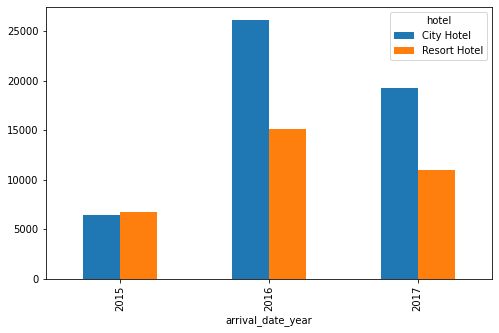

In [71]:
gr1.plot(kind = 'bar', figsize = (8,5))

In [72]:
gr2 = df1.loc[:,['hotel','arrival_date_year','arrival_date_month']]
gr2.replace({'July':7, 'August':8, 'September':9, 'October':10, 'November':11, 'December':12,'January':1, 'February':2, 'March':3, 'April':4, 'May':5, 'June':6}, inplace = True)
gr3 = gr2.groupby(['hotel','arrival_date_year']).arrival_date_month.value_counts().unstack(level=0)
gr3

hotel                                 City Hotel  Resort Hotel
arrival_date_year arrival_date_month                          
2015              7                          392          1262
                  8                         1071          1337
                  9                         1619          1131
                  10                        1529          1127
                  11                         795           864
                  12                        1004           958
2016              1                         1019           819
                  2                         1642          1142
                  3                         2347          1463
                  4                         2400          1357
                  5                         2279          1418
                  6                         2263          1203
                  7                         2439          1321
                  8                         2747          1561
                  9                         2463          1085
                  10                        2554          1391
                  11                        2085          1179
                  12                        1908          1138
2017              1                         1654          1140
                  2                         1907          1338
                  3                         2442          1163
                  4                         2591          1456
                  5                         2918          1384
                  6                         2596          1331
                  7                         2650          1558
                  8                         2535          1606

<AxesSubplot:xlabel='arrival_date_year,arrival_date_month'>

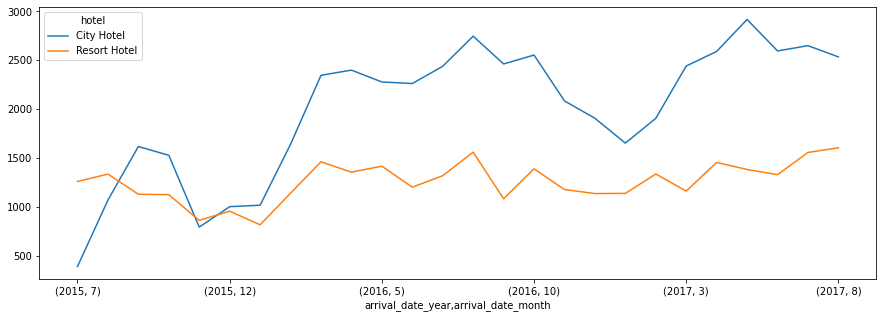

In [73]:
gr3.plot(kind = 'line', figsize = (15,5))

Text(0, 0.5, 'adr')

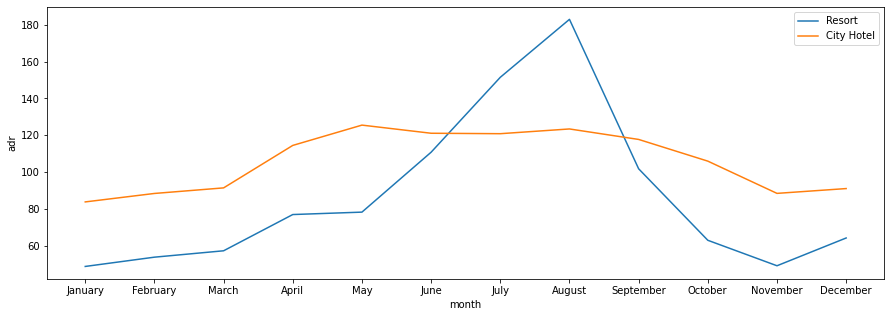

In [74]:
data_resort = df1[(df1['hotel'] == 'Resort Hotel') & (df1['is_canceled'] == 0)]
data_city = df1[(df1['hotel'] == 'City Hotel') & (df1['is_canceled'] == 0)]
resort_hotel = data_resort.groupby(['arrival_date_month'])['adr'].mean().reset_index()
city_hotel=data_city.groupby(['arrival_date_month'])['adr'].mean().reset_index()
final_hotel = resort_hotel.merge(city_hotel, on = 'arrival_date_month')
final_hotel.columns = ['month', 'adr_resort', 'adr_city_hotel']
final_hotel
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
final_hotel['month'] = pd.Categorical(final_hotel['month'], categories=months, ordered=True)
final_hotel = final_hotel.sort_values('month').reset_index()
final_hotel
plt.figure(figsize=(15,5))
sns.lineplot(data=final_hotel, x='month', y='adr_resort')
sns.lineplot(data=final_hotel, x='month', y='adr_city_hotel')
plt.legend(['Resort','City Hotel'])
plt.ylabel('adr')


Text(0, 0.5, 'Number of guest')

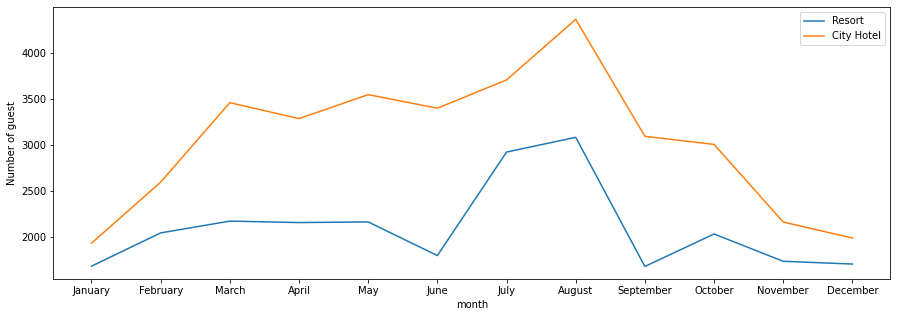

In [75]:
#Which are the most busy months?
resort_guest = data_resort['arrival_date_month'].value_counts().reset_index()
resort_guest.columns=['month','no of guests']
resort_guest

city_guest = data_city['arrival_date_month'].value_counts().reset_index()
city_guest.columns=['month','no of guests']
city_guest

final_guest=resort_guest.merge(city_guest, on = 'month')
final_guest.columns=['month','no of guests in resort','no of guest in city hotel']
final_guest
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
final_guest['month'] = pd.Categorical(final_guest['month'], categories=months, ordered=True)
final_guest = final_guest.sort_values('month').reset_index()

#Which month get most visitors?
plt.figure(figsize=(15,5))
sns.lineplot(data=final_guest, x='month', y='no of guests in resort')
sns.lineplot(data=final_guest, x='month', y='no of guest in city hotel')
plt.legend(['Resort','City Hotel'])
plt.ylabel('Number of guest')